In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=de1d28cd7625ed67b0e096aedc844200b39dfe233320c092015c2fb6703da4df
  Stored in directory: c:\users\jayym\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [6]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [7]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [8]:
df.groupby('koi_disposition').count()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687,...,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
CONFIRMED,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,...,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
FALSE POSITIVE,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,...,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504


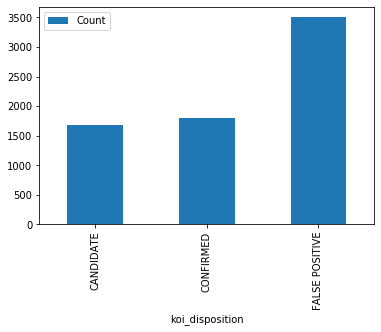

In [9]:
grouped_df = df[['koi_disposition','koi_fpflag_nt']].groupby('koi_disposition').count()
grouped_df = grouped_df.rename(columns={"koi_fpflag_nt":"Count"})
grouped_df.plot(kind="bar")

# Select your features (columns)

In [11]:
# Set features. This will also be used as your x values.
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [12]:
# Set features. This will also be used as x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [13]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['koi_disposition']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (6991, 40) (6991, 1)


In [14]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y.flatten())
encoded_y = label_encoder.transform(y.flatten())
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [15]:
encoded_y = encoded_y.reshape(-1, 1)

In [17]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Clas

Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
-----------

Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDI

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITI

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE P

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: 

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FA

In [18]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [19]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [20]:
y_train.shape

(5243, 1)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [21]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Train the Model



In [22]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=1000)
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model2.fit(X_train_scaled, y_train.flatten())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8481785237459469
Testing Data Score: 0.8443935926773455


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [25]:
model2.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [26]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'penalty': ['l2','none'],
              'class_weight': [{0:1, 1:1, 2:2}, "balanced", None]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [27]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.856, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.844, total=   0.4s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.859, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.827, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.839, total=   0.4s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   1.8s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   1.8s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.893, total=   2.0s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.870, total=   2.1s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   1.7s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.861, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.841, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.859, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.835, total=   0.6s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.844, total=   0.5s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.889, total=   2.0s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.886, total=   1.9s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.895, total=   2.1s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.875, total=   1.9s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.885, total=   2.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.857, total=   0.4s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.843, total=   0.4s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.858, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.827, total=   0.4s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.839, total=   0.4s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.893, total=   1.8s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.884, total=   1.7s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.895, total=   1.6s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.873, total=   1.9s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.884, total=   1.6s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.879, total=   0.7s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.855, total=   1.0s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.877, total=   0.9s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.849, total=   1.3s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.864, total=   1.1s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   1.7s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   1.6s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.893, total=   2.7s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.870, total=   2.1s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   1.7s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.877, total=   0.9s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.860, total=   1.1s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.881, total=   1.0s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.846, total=   1.1s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.863, total=   1.3s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.889, total=   1.8s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.886, total=   1.8s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.895, total=   1.8s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.875, total=   1.8s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight=balanced, penalty=none, score=0.885, total=   1.7s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.877, total=   1.1s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.854, total=   0.8s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.877, total=   1.2s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.846, total=   1.2s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.864, total=   1.0s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.893, total=   2.5s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.884, total=   2.0s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.895, total=   1.8s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.873, total=   2.3s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight=None, penalty=none, score=0.884, total=   2.4s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.882, total=   1.1s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.861, total=   1.3s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.883, total=   1.2s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.854, total=   1.2s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.865, total=   1.1s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   2.1s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   2.2s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.893, total=   1.6s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.870, total=   2.0s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   1.6s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.883, total=   1.3s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.867, total=   1.1s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.888, total=   1.3s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.858, total=   1.3s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.867, total=   1.5s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.889, total=   1.8s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.886, total=   2.0s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.895, total=   2.1s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.875, total=   2.0s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, penalty=none, score=0.885, total=   1.8s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.882, total=   1.2s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.860, total=   1.2s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.885, total=   1.4s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.851, total=   1.9s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.865, total=   2.0s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.893, total=   2.5s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.884, total=   2.7s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.895, total=   2.5s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.873, total=   2.9s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=None, penalty=none, score=0.884, total=   2.2s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.894, total=   2.1s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.871, total=   2.1s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.892, total=   2.2s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.862, total=   2.1s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.874, total=   1.8s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   2.0s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   1.7s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.893, total=   1.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.870, total=   1.8s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   1.6s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.890, total=   1.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.875, total=   1.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.895, total=   1.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.867, total=   1.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.874, total=   1.8s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.889, total=   2.3s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.886, total=   1.7s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.895, total=   1.8s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.875, total=   1.7s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=none, score=0.885, total=   1.5s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.891, total=   1.6s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.872, total=   1.7s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.888, total=   1.7s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.861, total=   1.8s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=50, class_weight=None, penalty=l2, score=0.872, total=   1.9s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.893, total=   1.7s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.884, total=   2.0s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.895, total=   2.3s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.873, total=   1.7s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.1min finished


[CV]  C=50, class_weight=None, penalty=none, score=0.884, total=   1.9s


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'class_weight': [{0: 1, 1: 1, 2: 2}, 'balanced', None],
                         'penalty': ['l2', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [28]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 1, 'class_weight': 'balanced', 'penalty': 'none'}
0.8861316484620032


# Save the Model

In [29]:
# Make predictions with the hypertuned model
predictions = grid2.predict(X_test_scaled)

In [30]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test.flatten(), predictions,
                            target_names=["CANDIDATE", "CONFIRMED","FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.80      0.72      0.76       411
     CONFIRMED       0.78      0.83      0.81       484
FALSE POSITIVE       0.99      0.99      0.99       853

      accuracy                           0.88      1748
     macro avg       0.85      0.85      0.85      1748
  weighted avg       0.88      0.88      0.88      1748



In [32]:
# from sklearn.linear_model import LogisticRegression
hypertuned_model = LogisticRegression(C=1, class_weight=None, max_iter=1000, penalty='none')
hypertuned_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
hypertuned_model.fit(X_train_scaled, y_train.flatten())

C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print(f"Training Data Score: {hypertuned_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertuned_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8891855807743658
Testing Data Score: 0.8827231121281465


# Using Select From Model (SFM)

In [37]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model2, max_features=40)
sfm.fit(X_train_scaled, y_train.flatten())
feature_idx = sfm.get_support()
feature_name = selected_features.columns[feature_idx]
feature_name

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_teq', 'koi_model_snr', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg_err2'],
      dtype='object')

## Choosing features from SFM

In [38]:
# Set top features suggested by SFM. This will be used as x values.
sfm_features = df[[ 
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_teq', 'koi_model_snr', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg_err2']]
sfm_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk_err1,koi_time0bk_err2,koi_impact_err1,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,koi_slogg_err2
0,0,0,0,0,54.418383,0.003520,-0.003520,0.059,4.50700,0.11600,-0.11600,874.8,443,25.8,81,-81,-0.096
1,0,1,0,0,19.899140,0.000581,-0.000581,5.126,1.78220,0.03410,-0.03410,10829.0,638,76.3,158,-176,-0.176
2,0,1,0,0,1.736952,0.000115,-0.000115,0.115,2.40641,0.00537,-0.00537,8079.2,1395,505.6,157,-174,-0.168
3,0,0,0,0,2.525592,0.001130,-0.001130,0.235,1.65450,0.04200,-0.04200,603.3,1406,40.9,169,-211,-0.210
4,0,0,0,0,4.134435,0.001900,-0.001900,0.139,3.14020,0.06730,-0.06730,686.0,1160,40.2,189,-232,-0.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,0.015700,-0.015700,0.023,4.80600,0.63400,-0.63400,87.7,929,8.4,169,-152,-0.189
6987,0,1,1,0,0.527699,0.000170,-0.000170,0.051,3.22210,0.01740,-0.01740,1579.2,2088,453.3,139,-166,-0.196
6988,0,0,0,0,1.739849,0.007690,-0.007690,0.423,3.11400,0.22900,-0.22900,48.5,1608,10.6,165,-220,-0.224
6989,0,0,1,0,0.681402,0.002850,-0.002850,0.309,0.86500,0.16200,-0.16200,103.6,2218,12.3,193,-236,-0.224


## Create Train Test Split with SFM features

In [39]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X_sfm = sfm_features
y_sfm = df[['koi_disposition']].values.reshape(-1, 1)

print("Shape: ", X_sfm.shape, y_sfm.shape)

Shape:  (6991, 17) (6991, 1)


In [40]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_sfm.flatten())
encoded_y_sfm = label_encoder.transform(y_sfm.flatten())
encoded_y_sfm

array([1, 2, 2, ..., 0, 2, 2])

In [41]:
encoded_y_sfm = encoded_y_sfm.reshape(-1, 1)
encoded_y_sfm

array([[1],
       [2],
       [2],
       ...,
       [0],
       [2],
       [2]])

In [42]:
for label, original_class in zip(encoded_y_sfm, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Ori

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
-

Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Ori

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Or

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE P

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encod

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
-

In [43]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train_sfm, X_test_sfm, y_train_sfm, y_test_sfm = train_test_split(X_sfm, encoded_y_sfm, random_state=42)

## Pre-processing - SFM features data

In [44]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_minmax_sfm = MinMaxScaler().fit(X_train_sfm)

X_train_scaled_sfm = X_minmax_sfm.transform(X_train_sfm)
X_test_scaled_sfm = X_minmax_sfm.transform(X_test_sfm)

## Train the model with SFM Features

In [45]:
from sklearn.linear_model import LogisticRegression
model_sfm = LogisticRegression(max_iter=500)
model_sfm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model_sfm.fit(X_train_scaled_sfm, y_train_sfm.flatten())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
print(f"Training Data Score: {model_sfm.score(X_train_scaled_sfm, y_train_sfm)}")
print(f"Testing Data Score: {model_sfm.score(X_test_scaled_sfm, y_test_sfm)}")

Training Data Score: 0.8466526797634942
Testing Data Score: 0.8323798627002288


## Hyperparameter Tuning on SFM Features

In [48]:
model_sfm.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [49]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid_sfm = {'C': [1, 5, 10, 50],
              'penalty': ['l2', 'none'],
              'class_weight': [{0:1, 1:1, 2:2}, "balanced", None]}
grid2_sfm = GridSearchCV(model_sfm, param_grid_sfm, verbose=3)

In [50]:
# Train the model with GridSearch
grid2_sfm.fit(X_train_scaled_sfm, y_train_sfm.flatten())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.858, total=   0.2s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.836, total=   0.2s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.852, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.826, total=   0.3s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.833, total=   0.3s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.894, total=   0.7s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   0.8s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   0.9s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.9s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   0.9s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.862, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.836, total=   0.3s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.855, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.830, total=   0.3s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.841, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.894, total=   1.1s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.879, total=   1.1s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.890, total=   1.1s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.871, total=   1.1s
[CV] C=1, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.882, total=   1.0s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.858, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.836, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.852, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.826, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.833, total=   0.3s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.892, total=   0.7s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.879, total=   0.8s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.888, total=   0.8s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.868, total=   0.8s
[CV] C=1, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.886, total=   0.9s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.885, total=   0.5s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.856, total=   0.4s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.865, total=   0.5s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.846, total=   0.6s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.858, total=   0.4s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.894, total=   0.8s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   0.8s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   0.7s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.8s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   0.9s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.889, total=   0.7s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.859, total=   0.5s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.869, total=   0.5s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.848, total=   0.5s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.860, total=   0.5s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.894, total=   0.7s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.879, total=   0.7s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.890, total=   0.9s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.871, total=   0.8s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight=balanced, penalty=none, score=0.882, total=   0.7s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.884, total=   0.5s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.856, total=   0.4s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.864, total=   0.5s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.846, total=   0.5s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.859, total=   0.4s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.892, total=   0.7s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.879, total=   0.8s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.888, total=   0.8s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.868, total=   0.8s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight=None, penalty=none, score=0.886, total=   0.9s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.890, total=   0.8s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.862, total=   0.7s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.873, total=   0.9s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.860, total=   0.8s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.865, total=   0.8s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.894, total=   1.0s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   0.8s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   0.7s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.8s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   0.7s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.891, total=   0.7s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.867, total=   0.6s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.870, total=   0.8s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.858, total=   0.7s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.870, total=   0.5s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.894, total=   0.8s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.879, total=   0.7s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.890, total=   0.7s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.871, total=   0.7s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, penalty=none, score=0.882, total=   0.7s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.891, total=   0.6s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.863, total=   0.7s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.873, total=   0.6s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.859, total=   0.6s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.865, total=   0.5s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.892, total=   0.7s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.879, total=   0.8s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.888, total=   0.7s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.868, total=   0.8s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=None, penalty=none, score=0.886, total=   0.7s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.895, total=   0.7s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.881, total=   0.8s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.881, total=   0.8s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.868, total=   0.9s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.881, total=   0.9s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.894, total=   0.8s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.882, total=   0.8s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   0.9s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.8s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.885, total=   0.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.895, total=   0.8s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.879, total=   0.8s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.886, total=   0.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.871, total=   0.8s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.877, total=   0.7s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.894, total=   1.2s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.879, total=   0.8s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.890, total=   0.8s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.871, total=   0.8s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=none, score=0.882, total=   0.8s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.895, total=   0.9s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.880, total=   0.7s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.880, total=   0.7s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.868, total=   0.7s
[CV] C=50, class_weight=None, penalty=l2 .............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=50, class_weight=None, penalty=l2, score=0.880, total=   0.7s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.892, total=   0.7s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.879, total=   0.7s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.888, total=   0.8s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.868, total=   0.7s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.4min finished


[CV]  C=50, class_weight=None, penalty=none, score=0.886, total=   0.7s


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'class_weight': [{0: 1, 1: 1, 2: 2}, 'balanced', None],
                         'penalty': ['l2', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [51]:
print(grid2_sfm.best_params_)
print(grid2_sfm.best_score_)

{'C': 1, 'class_weight': 'balanced', 'penalty': 'none'}
0.8832703265196227


In [52]:
# Make predictions with the hypertuned model
predictions_sfm = grid2_sfm.predict(X_test_scaled_sfm)

In [53]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_sfm.flatten(), predictions_sfm,
                            target_names=["CANDIDATE", "CONFIRMED","FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.79      0.70      0.74       411
     CONFIRMED       0.77      0.83      0.80       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.88      0.88      0.88      1748



In [54]:
hypertuned_model_sfm = LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='none')
hypertuned_model_sfm

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
hypertuned_model_sfm.fit(X_train_scaled_sfm, y_train_sfm.flatten())

C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print(f"Training Data Score: {hypertuned_model_sfm.score(X_train_scaled_sfm, y_train_sfm)}")
print(f"Testing Data Score: {hypertuned_model_sfm.score(X_test_scaled_sfm, y_test_sfm)}")

Training Data Score: 0.8844173183292008
Testing Data Score: 0.8804347826086957


## Method 3 - Using Recursive Feature Elimination (FRE)

In [57]:
from sklearn.feature_selection import RFE
predictors = X_train_scaled
selector = RFE(model2, n_features_to_select = 1)
selector = selector.fit(predictors, y_train.flatten());

In [59]:
order = selector.ranking_
order

array([ 4,  6,  5,  7, 11, 19, 21, 23,  3,  9, 29, 13, 32, 16,  1,  2, 15,
       37, 38, 36, 34, 40, 10, 35, 33, 39, 12, 20, 22,  8, 18, 17, 25, 14,
       28, 24, 30, 27, 26, 31])

In [60]:
feature_ranks = []
column_num = 0
for i in order:
    feature_ranks.append(f"{i}. {selected_features.columns[column_num]}")
    column_num += 1
feature_ranks

['4. koi_fpflag_nt',
 '6. koi_fpflag_ss',
 '5. koi_fpflag_co',
 '7. koi_fpflag_ec',
 '11. koi_period',
 '19. koi_period_err1',
 '21. koi_period_err2',
 '23. koi_time0bk',
 '3. koi_time0bk_err1',
 '9. koi_time0bk_err2',
 '29. koi_impact',
 '13. koi_impact_err1',
 '32. koi_impact_err2',
 '16. koi_duration',
 '1. koi_duration_err1',
 '2. koi_duration_err2',
 '15. koi_depth',
 '37. koi_depth_err1',
 '38. koi_depth_err2',
 '36. koi_prad',
 '34. koi_prad_err1',
 '40. koi_prad_err2',
 '10. koi_teq',
 '35. koi_insol',
 '33. koi_insol_err1',
 '39. koi_insol_err2',
 '12. koi_model_snr',
 '20. koi_tce_plnt_num',
 '22. koi_steff',
 '8. koi_steff_err1',
 '18. koi_steff_err2',
 '17. koi_slogg',
 '25. koi_slogg_err1',
 '14. koi_slogg_err2',
 '28. koi_srad',
 '24. koi_srad_err1',
 '30. koi_srad_err2',
 '27. ra',
 '26. dec',
 '31. koi_kepmag']

## Choosing Top 10 features from RFE

In [61]:
# Set top 10 features suggested by RFE. This will be used as x values.
top_10_features = df[[ 
    'koi_duration_err1',
'koi_duration_err2',
'koi_time0bk_err1',
'koi_fpflag_nt',
'koi_fpflag_ss',
'koi_fpflag_co',
'koi_fpflag_ec',
'koi_steff_err1',
'koi_time0bk_err2',
'koi_teq',]]
top_10_features

,koi_duration_err1,koi_duration_err2,koi_time0bk_err1,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff_err1,koi_time0bk_err2,koi_teq
0,0.11600,-0.11600,0.003520,0,0,0,0,81,-0.003520,443
1,0.03410,-0.03410,0.000581,0,1,0,0,158,-0.000581,638
2,0.00537,-0.00537,0.000115,0,1,0,0,157,-0.000115,1395
3,0.04200,-0.04200,0.001130,0,0,0,0,169,-0.001130,1406
4,0.06730,-0.06730,0.001900,0,0,0,0,189,-0.001900,1160
...,...,...,...,...,...,...,...,...,...,...
6986,0.63400,-0.63400,0.015700,0,0,0,1,169,-0.015700,929
6987,0.01740,-0.01740,0.000170,0,1,1,0,139,-0.000170,2088
6988,0.22900,-0.22900,0.007690,0,0,0,0,165,-0.007690,1608
6989,0.16200,-0.16200,0.002850,0,0,1,0,193,-0.002850,2218


## Create Train Test Split with Top 10 features

In [62]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X_top10 = top_10_features
y_top10 = df[['koi_disposition']].values.reshape(-1, 1)

print("Shape: ", X_top10.shape, y_top10.shape)

Shape:  (6991, 10) (6991, 1)


In [63]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_top10.flatten())
encoded_y_top10 = label_encoder.transform(y_top10.flatten())
encoded_y_top10

array([1, 2, 2, ..., 0, 2, 2])

In [64]:
encoded_y_top10 = encoded_y_top10.reshape(-1, 1)
encoded_y_top10

array([[1],
       [2],
       [2],
       ...,
       [0],
       [2],
       [2]])

In [65]:
for label, original_class in zip(encoded_y_top10, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFI

Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE'

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']


------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
En

Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class:

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Origina

Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------

Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------

In [66]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(X_top10, encoded_y_top10, random_state=42)

## Pre-processing - Top 10 feature data

In [67]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_minmax_top10 = MinMaxScaler().fit(X_train_top10)

X_train_scaled_top10 = X_minmax_top10.transform(X_train_top10)
X_test_scaled_top10 = X_minmax_top10.transform(X_test_top10)

## Train the Model with Top 10 Feature

In [68]:
from sklearn.linear_model import LogisticRegression
model_top10 = LogisticRegression(max_iter=1000)
model_top10

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
model_top10.fit(X_train_scaled_top10, y_train_top10.flatten())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
print(f"Training Data Score: {model_top10.score(X_train_scaled_top10, y_train_top10)}")
print(f"Testing Data Score: {model_top10.score(X_test_scaled_top10, y_test_top10)}")

Training Data Score: 0.8460804882700744
Testing Data Score: 0.8335240274599542


## Hyperparameter Tuning on Top 10 Features

In [72]:
model_top10.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [73]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid_top10 = {'C': [1, 5, 10, 50],
              'penalty': ['l2', 'none'],
              'class_weight': [{0:1, 1:1, 2:2}, "balanced", None]}
grid2_top10 = GridSearchCV(model_top10, param_grid_top10, verbose=3)

In [74]:
# Train the model with GridSearch
grid2_top10.fit(X_train_scaled_top10, y_train_top10.flatten())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.858, total=   0.2s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.840, total=   0.2s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.856, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.826, total=   0.2s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.838, total=   0.2s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.880, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.874, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.848, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ...........

C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.880, total=   0.4s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.4s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.874, total=   0.6s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.848, total=   0.7s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.863, total=   0.4s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.878, total=   0.3s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.853, total=   0.3s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.863, total=   0.4s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.834, total=   0.3s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.863, total=   0.3s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.879, total=   0.5s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.865, total=   0.5s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.875, total=   0.7s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.847, total=   0.6s
[CV] C=5, class_weight=balanced, penalty=none ........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.862, total=   0.8s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.875, total=   0.4s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.851, total=   0.3s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.863, total=   0.3s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.837, total=   0.4s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.860, total=   0.3s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.880, total=   0.4s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.865, total=   0.4s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.874, total=   0.4s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.848, total=   1.1s
[CV] C=5, class_weight=None, penalty=none ............................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.863, total=   0.6s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.881, total=   0.6s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.852, total=   0.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.864, total=   0.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.841, total=   0.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.861, total=   0.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.880, total=   0.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.4s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.874, total=   0.6s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.848, total=   0.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.863, total=   0.4s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.882, total=   0.5s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.855, total=   0.4s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.867, total=   0.4s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.843, total=   0.4s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.858, total=   0.4s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.879, total=   0.5s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.865, total=   0.5s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.875, total=   0.7s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.847, total=   0.8s
[CV] C=10, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.862, total=   1.1s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.881, total=   0.4s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.852, total=   0.4s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.864, total=   0.4s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.842, total=   0.4s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.862, total=   0.3s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.880, total=   0.4s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.865, total=   0.4s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.874, total=   0.4s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.848, total=   0.7s
[CV] C=10, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.863, total=   0.4s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.883, total=   0.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.865, total=   0.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.867, total=   0.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.846, total=   0.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.860, total=   0.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.880, total=   0.5s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.866, total=   0.5s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.874, total=   0.7s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.848, total=   0.5s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.863, total=   0.4s
[CV] C=50, class_weight=balanced, penalty=l2 .........................
[CV]  C=50, class_weight=balanced, penalty=l2, score=0.880, total=   0.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................
[CV]  C=50, class_weight=balanced, penalty=l2, score=0.862, total=   0.9s
[CV] C=50, class_weight=balanced, penalty=l2 .........................
[CV]  C=50, class_weight=balanced, penalty=l2, score=0.869, total=   0.7s
[CV] C=50, class_weight=balanced, penalty=l2 .........................
[CV]  C=50, class_weight=balanced, penalty=l2, score=0.843, total=   0.6s
[CV] C=50, class_weight=balanced, penalty=l2 .........................
[CV]  C=50, class_weight=balanced, penalty=l2, score=0.859, total=   0.6s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.879, total=   0.5s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.865, total=   0.5s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.875, total=   0.7s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.847, total=   0.7s
[CV] C=50, class_weight=balanced, penalty=none .......................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.862, total=   0.8s
[CV] C=50, class_weight=None, penalty=l2 .............................
[CV] . C=50, class_weight=None, penalty=l2, score=0.882, total=   0.6s
[CV] C=50, class_weight=None, penalty=l2 .............................
[CV] . C=50, class_weight=None, penalty=l2, score=0.865, total=   0.6s
[CV] C=50, class_weight=None, penalty=l2 .............................
[CV] . C=50, class_weight=None, penalty=l2, score=0.867, total=   0.5s
[CV] C=50, class_weight=None, penalty=l2 .............................
[CV] . C=50, class_weight=None, penalty=l2, score=0.846, total=   0.6s
[CV] C=50, class_weight=None, penalty=l2 .............................
[CV] . C=50, class_weight=None, penalty=l2, score=0.860, total=   0.5s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.880, total=   0.4s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.865, total=   0.3s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.874, total=   0.4s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.848, total=   0.7s
[CV] C=50, class_weight=None, penalty=none ...........................


C:\Users\jayym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.863, total=   0.4s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   58.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'class_weight': [{0: 1, 1: 1, 2: 2}, 'balanced', None],
                         'penalty': ['l2', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [75]:
print(grid2_top10.best_params_)
print(grid2_top10.best_score_)

{'C': 1, 'class_weight': {0: 1, 1: 1, 2: 2}, 'penalty': 'none'}
0.8661031225667484


In [76]:
# Make predictions with the hypertuned model
predictions_top10 = grid2_top10.predict(X_test_scaled_top10)

In [77]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_top10.flatten(), predictions_top10,
                            target_names=["CANDIDATE", "CONFIRMED","FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.76      0.65      0.70       411
     CONFIRMED       0.74      0.80      0.77       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.86      1748
     macro avg       0.83      0.82      0.82      1748
  weighted avg       0.86      0.86      0.86      1748



In [78]:
hypertuned_model_top10 = LogisticRegression(C=1, class_weight={0: 1, 1: 1, 2: 2}, max_iter=1000, penalty='none')
hypertuned_model_top10

LogisticRegression(C=1, class_weight={0: 1, 1: 1, 2: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [79]:
hypertuned_model_top10.fit(X_train_scaled_top10, y_train_top10.flatten())

LogisticRegression(C=1, class_weight={0: 1, 1: 1, 2: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [80]:
print(f"Training Data Score: {hypertuned_model_top10.score(X_train_scaled_top10, y_train_top10)}")
print(f"Testing Data Score: {hypertuned_model_top10.score(X_test_scaled_top10, y_test_top10)}")

Training Data Score: 0.8685866870112531
Testing Data Score: 0.8627002288329519


In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)